In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

In [2]:
#Aufgabe 1

U_H = 5.25 # Heizspannung [V]
Fehler_U_H = 0.01

I_H = 1.05 *5# Heizstrom [A]
Fehler_I_H = 0.01 *5

f = 290.0 /60 # Motordrehzahl [Hz]
Fehler_f = 0.5 /60

U_M = 24.0 # Motorspannung [V]
Fehler_U_M = 0.1

I_M = 1.55 # Motorstrom [A]
Fehler_I_M = 0.05

V_punkt = 213 /(1e6*60) #Volumenstrom des Kühlwassers [m^3/s]
Fehler_V_punkt = 2 /(1e6*60)

T_zu = 17.5 +273.15 # Temperatur des Zuwassers [K]
Fehler_T_zu = 0.1

T_ab = 20.8 +273.15 # Temperatur des Abwassers [K]
Fehler_T_ab = 0.1

c_W = 4180 # spezifische Wärmekapazität von Wasser [J/(kg*K)]
Fehler_c_W = 0.5

rho_W = 998 # Dichte von Wasser [kg/m^3]
Fehler_rho_W = 1

P_M = U_M*I_M # Motorleistung [W]
Fehler_P_M = abs(P_M)*np.sqrt((Fehler_U_M/U_M)**2+(Fehler_I_M/I_M)**2)

W_M = P_M/f # zugeführte mechanische Arbeit pro Umlauf [J]
Fehler_W_M = abs(W_M)*np.sqrt((Fehler_P_M/P_M)**2+(Fehler_f/f)**2)

Delta_T = T_ab-T_zu # Temperaturdifferenz von Zu- und Abwasser [K]
Fehler_Delta_T = np.sqrt(Fehler_T_zu**2+Fehler_T_ab**2)

P_H = U_H*I_H # Heizleistung [W]
Fehler_P_H = abs(P_H)*np.sqrt((Fehler_U_H/U_H)**2+(Fehler_I_H/I_H)**2)

W_H = P_H/f # dem Zylinder zugeführte Wärme pro Umlauf [J]
Fehler_W_H = abs(W_H)*np.sqrt((Fehler_P_H/P_H)**2+(Fehler_f/f)**2)

P_1 = c_W*rho_W*Delta_T*V_punkt # vom Kühlreislauf abgeführete Wärmeleistung [W]
Fehler_P_1 = abs(P_1)*np.sqrt((Fehler_c_W/c_W)**2+(Fehler_rho_W/rho_W)**2+(Fehler_Delta_T/Delta_T)**2
                              +(Fehler_V_punkt/V_punkt)**2)

Q_1 = P_1/f # vom Kühlreislauf abgeführte Wärme pro Umlauf [J]
Fehler_Q_1 = abs(Q_1)*np.sqrt((Fehler_P_1/P_1)**2+(Fehler_f/f)**2)

#Ausgabe
print('Heizleistung: ')
print('P_H [W] =', format_e(P_H), ' +- ', format_e(Fehler_P_H))
print('\n')
print('vom Kühlreislauf abgeführte Wärmeleistung: ')
print('P_1 [W] =', format_e(P_1), ' +- ', format_e(Fehler_P_1))
print('\n')
print('Motorleistung: ')
print('P_M [W] =', format_e(P_M), ' +- ', format_e(Fehler_P_M))
print('\n')
print('dem Zylinder zugeführte Wärme pro Umlauf: ')
print('W_H [J] =', format_e(W_H), ' +- ', format_e(Fehler_W_H))
print('\n')
print('vom Kühlreislauf abgeführte Wärme pro Umlauf: ')
print('Q_1 [J] =', format_e(Q_1), ' +- ', format_e(Fehler_Q_1))
print('\n')
print('zugeführte mechanische Arbeit pro Umlauf: ')
print('W_M [J] =', format_e(W_M), ' +- ', format_e(Fehler_W_M))

Heizleistung: 
P_H [W] = 2.75625e+01  +-  2.676985e-01


vom Kühlreislauf abgeführte Wärmeleistung: 
P_1 [W] = 4.887076e+01  +-  2.144603e+00


Motorleistung: 
P_M [W] = 3.72e+01  +-  1.209969e+00


dem Zylinder zugeführte Wärme pro Umlauf: 
W_H [J] = 5.702586e+00  +-  5.625182e-02


vom Kühlreislauf abgeführte Wärme pro Umlauf: 
Q_1 [J] = 1.011119e+01  +-  4.440534e-01


zugeführte mechanische Arbeit pro Umlauf: 
W_M [J] = 7.696552e+00  +-  2.506899e-01


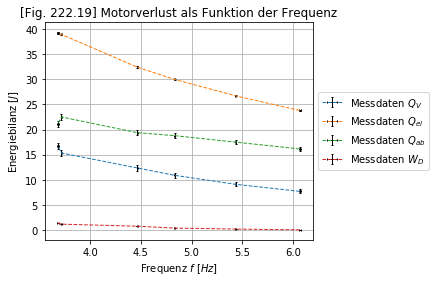

In [3]:
#Aufgabe 3 Teil 1

U_H = np.array([11.46,11.48,11.46,11.45,11.45,11.42]) # Heizspannung [V]

I_H = np.array([2.52,2.53,2.53,2.53,2.53,2.53]) *5# Heizstrom [A]
Fehler_I_H = 0.01 *5

f = np.array([364,326,290,268,223,221]) /60 # Motordrehzahl [Hz] 
Fehler_f = 0.5 /60

V_punkt = np.array([204,204,204,204,204,204]) /(1e6*60) # Volumenstrom des Kühlwassers [m^3/s]
Fehler_V_punkt = 2 /(1e6*60)

T_zu = np.array([17.6,17.6,17.6,17.7,17.7,17.7]) +273.15 # Temperatur des Zuwassers [K]
Fehler_T_zu = 0.1

T_ab = np.array([24.5,24.3,24.0,23.8,23.6,23.2]) +273.15 # Temperatur des Abwassers [K]
Fehler_T_ab = 0.1

l = 25.0 /1e2 # Zaumlänge [m]
Fehler_l = 0.2 /1e2

F = np.array([1e-6,0.10,0.22,0.46,0.72,0.86]) # [N]
Fehler_F = 0.01

W_pV = np.array([19100,19975,20577,24985,24704,25936]) /1e4 # Arbeit [J]
Fehler_W_pV = W_pV *0.05

P_pV = W_pV*f # [W]
Fehler_P_pV = abs(P_pV)*np.sqrt((Fehler_W_pV/W_pV)**2+(Fehler_f/f)**2)

Delta_T = T_ab-T_zu #Temperaturdifferenz von Zu- und Abwasser [K]
Fehler_Delta_T = np.sqrt(Fehler_T_zu**2+Fehler_T_ab**2)

P_ab = c_W*rho_W*Delta_T*V_punkt # vom Kühlreislauf abgeführete Wärmeleistung [W]
Fehler_P_ab = abs(P_ab)*np.sqrt((Fehler_c_W/c_W)**2+(Fehler_rho_W/rho_W)**2+(Fehler_Delta_T/Delta_T)**2
                              +(Fehler_V_punkt/V_punkt)**2)

Q_ab = P_ab/f # vom Kühlreislauf abgeführte Wärme pro Umlauf [J]
Fehler_Q_ab = abs(Q_ab)*np.sqrt((Fehler_P_ab/P_ab)**2+(Fehler_f/f)**2)

P_el = U_H*I_H # Heizleistung [W]
Fehler_P_el = abs(P_el)*np.sqrt((Fehler_U_H/U_H)**2+(Fehler_I_H/I_H)**2)

Q_el = P_el/f # dem Zylinder zugeführte Wärme pro Umlauf [J]
Fehler_Q_el = abs(Q_el)*np.sqrt((Fehler_P_el/P_el)**2+(Fehler_f/f)**2)

D = l*F
Fehler_D = abs(D)*np.sqrt((Fehler_l/l)**2+(Fehler_F/F)**2)

W_D = 2*np.pi*D
Fehler_W_D = 2*np.pi*Fehler_D

Q_V = Q_el-Q_ab-W_D
Fehler_Q_V = np.sqrt(Fehler_Q_el**2+Fehler_Q_ab**2++Fehler_W_D**2)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(f, Q_V, yerr=Fehler_Q_V, xerr=Fehler_f, lw=1, ecolor='k', fmt='C0--', capsize=1, label='Messdaten '+r'${Q_V}$')
plt.errorbar(f, Q_el, yerr=Fehler_Q_el, xerr=Fehler_f, lw=1, ecolor='k', fmt='C1--', capsize=1, label='Messdaten '+r'${Q_{el}}$')
plt.errorbar(f, Q_ab, yerr=Fehler_Q_ab, xerr=Fehler_f, lw=1, ecolor='k', fmt='C2--', capsize=1, label='Messdaten '+r'${Q_{ab}}$')
plt.errorbar(f, W_D, yerr=Fehler_W_D, xerr=Fehler_f, lw=1, ecolor='k', fmt='C3--', capsize=1, label='Messdaten '+r'${W_D}$')
plt.title('[Fig. 222.19] Motorverlust als Funktion der Frequenz')
plt.grid(True)
plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
plt.ylabel('Energiebilanz '+r'${[J]}$')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('figures/222_Fig1.pdf', format='pdf', bbox_inches='tight')

Wirkungsgrad:
eta = 8.948404e-02  +-  3.939434e-03
Chi-Quadrat = 27.628043109585676
Freiheitsgrade = 5
Chi-Quadrat reduziert = 5.525608621917135
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 0.0 %


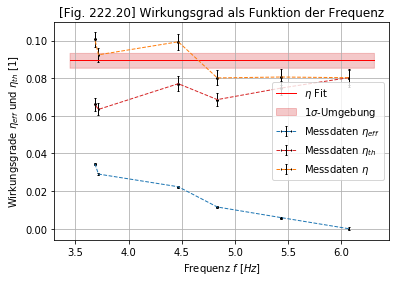

In [4]:
#Aufgabe 3 Teil 2

eta_eff = W_D/Q_el
Fehler_eta_eff= abs(eta_eff)*np.sqrt((Fehler_W_D/W_D)**2+(Fehler_Q_el/Q_el)**2)

eta_th = W_pV/Q_el
Fehler_eta_th= abs(eta_th)*np.sqrt((Fehler_W_pV/W_pV)**2+(Fehler_Q_el/Q_el)**2)

eta = eta_eff+eta_th
Fehler_eta = Fehler_eta_eff+Fehler_eta_th

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p 
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = eta
delta_x = Fehler_f
delta_y = Fehler_eta

#Startparameter
para0 = [0]
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()


#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(f, eta_eff, yerr=Fehler_eta_eff, xerr=Fehler_f, lw=1, ecolor='k', fmt='C0--', capsize=1, label='Messdaten '+r'${{\eta}_{eff}}$')
plt.errorbar(f, eta_th, yerr=Fehler_eta_th, xerr=Fehler_f, lw=1, ecolor='k', fmt='C3--', capsize=1, label='Messdaten '+r'${{\eta}_{th}}$')
plt.errorbar(f, eta, yerr=Fehler_eta, xerr=Fehler_f, lw=1, ecolor='k', fmt='C1--', capsize=1, label='Messdaten '+r'${\eta}$')
plt.plot(x_fit, fit, color='r', lw=1, label='${\eta}$ Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.title('[Fig. 222.20] Wirkungsgrad als Funktion der Frequenz')
plt.grid(True)
plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
plt.ylabel('Wirkungsgrade '+r'${{\eta}_{eff}}$'+' und '+r'${{\eta}_{th}}$'+' '+r'${[1]}$')
plt.legend(loc='best')

plt.savefig('figures/222_Fig2.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
eta_mean = popt[0]
Fehler_eta_mean = perr[0]

#Ausgabe
print('Wirkungsgrad:')
print('eta =', format_e(eta_mean), ' +- ', format_e(Fehler_eta_mean))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')